In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear Regression model
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder  # For feature scaling and encoding
from sklearn.impute import SimpleImputer  # To handle missing values
from sklearn.pipeline import Pipeline  # For creating a pipeline
from sklearn.compose import ColumnTransformer  # For managing column-specific transformations
from sklearn.base import BaseEstimator, TransformerMixin  # Base classes for creating custom transformers
from category_encoders import BinaryEncoder  # For nominal encoding
from sklearn.preprocessing import PolynomialFeatures  # For polynomial features transformation
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV  # For cross-validation and hyperparameter tuning
from sklearn.metrics import r2_score, mean_squared_error



In [2]:
df = pd.read_csv("autos.csv")
df

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,...,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


## Understand Data

#### price: The selling price of the vehicle.
#### vehicleType: The type of vehicle (e.g., car, truck, etc.).
#### yearOfRegistration: The year the vehicle was registered.
#### gearbox: The type of transmission (e.g., manual or automatic).
#### powerPS: The power output of the vehicle's engine measured in PS (Pferdestärke).
#### model: The model name of the vehicle.
#### kilometer: The number of kilometers the vehicle has been driven (mileage).
#### fuelType: The type of fuel the vehicle uses (e.g., petrol, diesel, electric).
#### brand: The manufacturer or brand of the vehicle.
#### notRepairedDamage: Indicates if the vehicle has damage that has not been repaired.
#### dateCreated: The date when the vehicle was first listed for sale.
#### lastSeen: The date when the vehicle was last seen or checked.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [4]:
for i in df.columns:
    print(f"{i}:",df[i].isna().sum() / len(df[i]) * 100)

index: 0.0
dateCrawled: 0.0
name: 0.0
seller: 0.0
offerType: 0.0
price: 0.0
abtest: 0.0
vehicleType: 10.192771473482482
yearOfRegistration: 0.0
gearbox: 5.439428522210978
powerPS: 0.0
model: 5.513447169526926
kilometer: 0.0
monthOfRegistration: 0.0
fuelType: 8.986132942873754
brand: 0.0
notRepairedDamage: 19.395577183953833
dateCreated: 0.0
nrOfPictures: 0.0
postalCode: 0.0
lastSeen: 0.0


In [5]:
df[df.price == 0]

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
7,7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,...,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
40,40,2016-03-26 22:06:17,Suche_Opel_corsa_a_zu_verschenken,privat,Angebot,0,test,NaN,1990,NaN,...,corsa,150000,1,benzin,opel,NaN,2016-03-26 00:00:00,0,56412,2016-03-27 17:43:34
115,115,2016-03-19 18:40:12,Golf_IV_1.4_16V,privat,Angebot,0,test,NaN,2017,manuell,...,golf,5000,12,benzin,volkswagen,NaN,2016-03-19 00:00:00,0,21698,2016-04-01 08:47:05
119,119,2016-03-20 18:53:27,Polo_6n_Karosse_zu_verschenken,privat,Angebot,0,test,kleinwagen,1999,NaN,...,NaN,5000,0,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,37520,2016-04-07 02:45:22
157,157,2016-03-11 18:55:53,Opel_meriva_1.6_16_v_lpg__z16xe_no_OPC,privat,Angebot,0,test,bus,2004,manuell,...,meriva,150000,10,lpg,opel,ja,2016-03-11 00:00:00,0,27432,2016-03-12 23:47:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371356,371356,2016-03-09 15:56:30,Verkaufen_einen_Opel_corsa_b_worlcup_cool,privat,Angebot,0,control,NaN,2000,manuell,...,corsa,150000,0,NaN,opel,ja,2016-03-09 00:00:00,0,23758,2016-03-30 11:16:08
371392,371392,2016-03-20 14:55:07,Ford_Fiesta_1.3___60PS___Bj_2002___Klima___Servo,privat,Angebot,0,test,kleinwagen,2002,manuell,...,fiesta,150000,3,benzin,ford,NaN,2016-03-20 00:00:00,0,33659,2016-04-06 18:45:23
371402,371402,2016-03-24 13:48:05,Suzuki_Swift_zu_verkaufen,privat,Angebot,0,control,kleinwagen,1999,manuell,...,swift,150000,3,benzin,suzuki,NaN,2016-03-24 00:00:00,0,42329,2016-04-07 05:17:24
371431,371431,2016-03-10 22:55:50,Seat_Arosa,privat,Angebot,0,control,kleinwagen,1999,manuell,...,arosa,150000,7,benzin,seat,ja,2016-03-10 00:00:00,0,22559,2016-03-12 23:46:32


In [6]:
for col in df.columns:
    print(f"{col}:\n")
    print("No.unique: ",df[col].nunique())
    print("unique value: ",df[col].unique(), "\n")
    print("**"*20)

index:

No.unique:  371528
unique value:  [     0      1      2 ... 371525 371526 371527] 

****************************************
dateCrawled:

No.unique:  280500
unique value:  ['2016-03-24 11:52:17' '2016-03-24 10:58:45' '2016-03-14 12:52:21' ...
 '2016-03-14 17:48:27' '2016-03-19 18:57:12' '2016-03-07 19:39:19'] 

****************************************
name:

No.unique:  233531
unique value:  ['Golf_3_1.6' 'A5_Sportback_2.7_Tdi' 'Jeep_Grand_Cherokee_"Overland"' ...
 'Smart_smart_leistungssteigerung_100ps' 'VW_Golf_Kombi_1_9l_TDI'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro'] 

****************************************
seller:

No.unique:  2
unique value:  ['privat' 'gewerblich'] 

****************************************
offerType:

No.unique:  2
unique value:  ['Angebot' 'Gesuch'] 

****************************************
price:

No.unique:  5597
unique value:  [  480 18300  9800 ... 18429 24895 10985] 

****************************************
abtest:

No.unique:  2
unique

In [7]:
df = df[df.price > 0]
df = df[df['vehicleType'].notna()]
df = df[df['model'].notna()]
df = df[df['fuelType'].notna()]

df['dateCreated'] = pd.to_datetime(df['dateCreated'], errors='coerce')
df['lastSeen'] = pd.to_datetime(df['lastSeen'], errors='coerce')

df['dateCreated'] = df['dateCreated'].dt.normalize()
df['lastSeen'] = df['lastSeen'].dt.normalize()

df['saleDurationDays'] = (df['lastSeen'] - df['dateCreated']).dt.days

for i in df['notRepairedDamage']:
    if i == 'ja':
        df['notRepairedDamage'].replace(i, 'yes', inplace=True)
    if i == 'nein':
        df['notRepairedDamage'].replace(i, 'no', inplace=True)

df.drop(columns=['index', 'nrOfPictures', 'postalCode', 'name', 'monthOfRegistration', 'seller', 'offerType', 'dateCrawled', 'abtest', 'dateCreated', 'lastSeen'],inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)


In [8]:
df

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,saleDurationDays
0,9800,suv,2004,automatik,163,grand,125000,diesel,jeep,NaN,22
1,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen,no,0
2,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda,no,6
3,650,limousine,1995,manuell,102,3er,150000,benzin,bmw,yes,2
4,2200,cabrio,2004,manuell,109,2_reihe,150000,benzin,peugeot,no,4
...,...,...,...,...,...,...,...,...,...,...,...
288101,3200,limousine,2004,manuell,225,leon,150000,benzin,seat,yes,0
288102,1199,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,no,6
288103,9200,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,no,19
288104,3400,kombi,2002,manuell,100,golf,150000,diesel,volkswagen,NaN,4


In [9]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,saleDurationDays
count,2.881060e+05,288106.000000,288106.000000,288106.000000,288106.000000
mean,9.763063e+03,2002.946204,122.536743,125088.665283,9.196546
std,5.361007e+05,6.604099,172.735559,39462.732630,8.707405
min,1.000000e+00,1910.000000,0.000000,5000.000000,0.000000
25%,1.450000e+03,1999.000000,75.000000,100000.000000,2.000000
50%,3.500000e+03,2003.000000,112.000000,150000.000000,6.000000
75%,8.000000e+03,2008.000000,150.000000,150000.000000,14.000000
max,1.000000e+08,2018.000000,20000.000000,150000.000000,384.000000


In [10]:
df.describe(include="O")

,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage
count,288106,282240,288106,288106,288106,249982
unique,8,2,251,7,39,2
top,limousine,manuell,golf,benzin,volkswagen,no
freq,82942,217868,23021,189592,59835,223251


## EDA

In [11]:
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [12]:
# Concatenate X_train and y_train for easier EDA
train_data = x_train.copy()
train_data['price'] = y_train

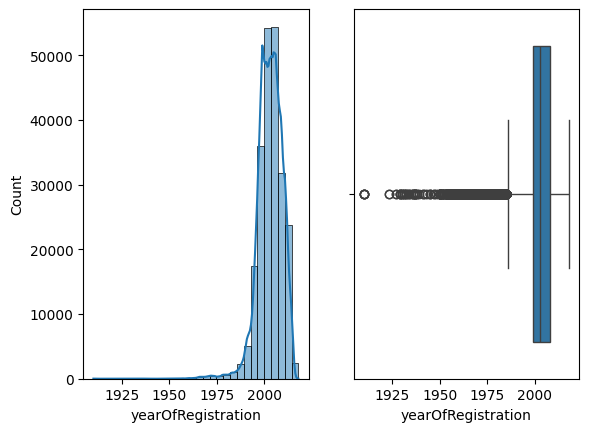

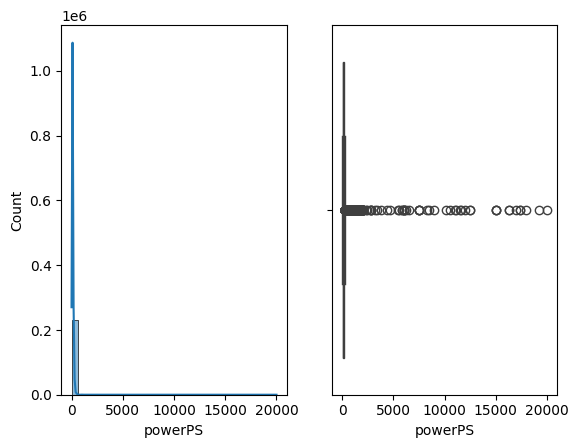

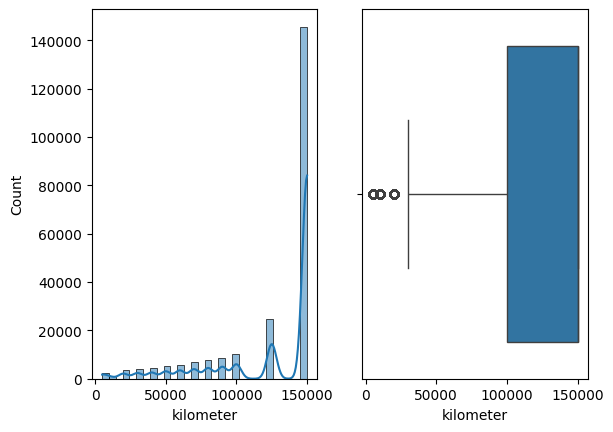

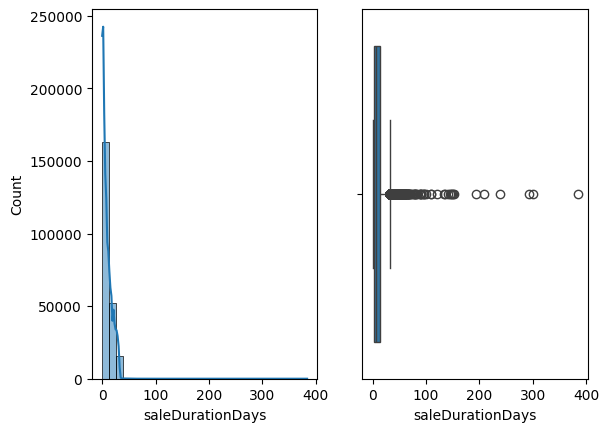

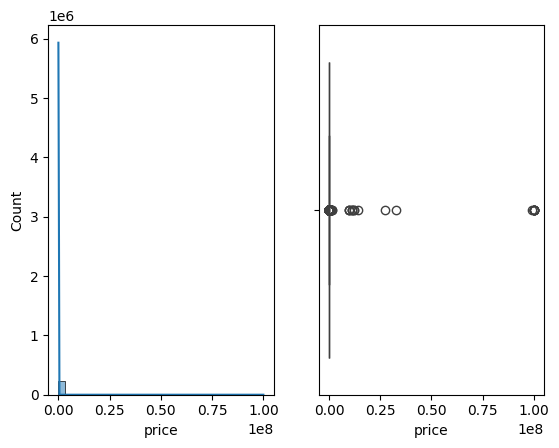

In [13]:
num_cols = train_data.select_dtypes(include="number").columns
for col in num_cols:
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(train_data[col], kde=True, ax=axes[0], bins=30)
    sns.boxplot(x=train_data[col], ax=axes[1])
    plt.show()


C:\Users\minas\AppData\Local\Temp\ipykernel_17496\3950282079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = x_train[column], palette='viridis')


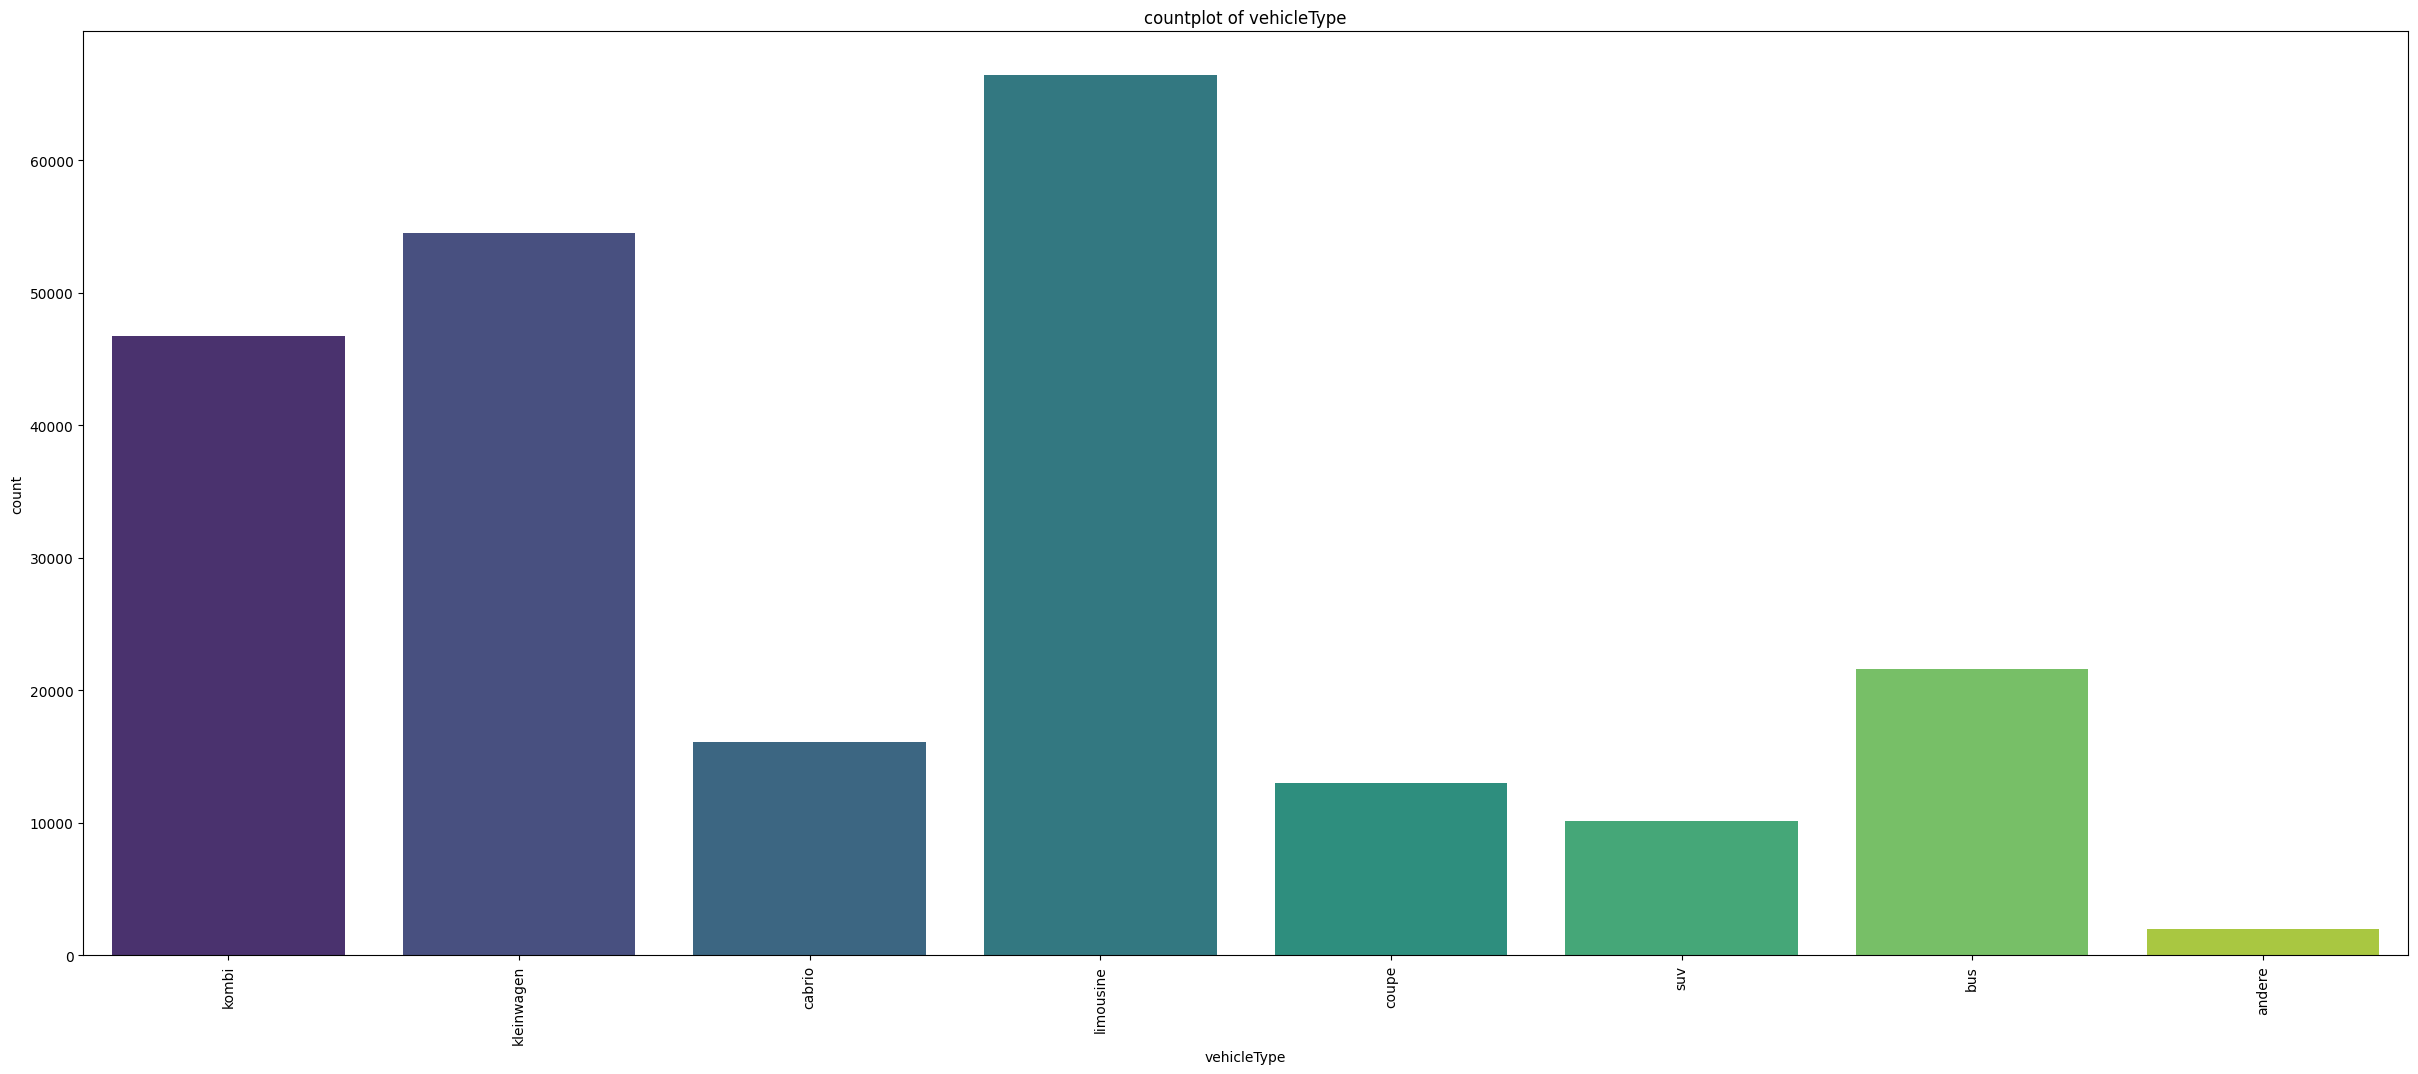

C:\Users\minas\AppData\Local\Temp\ipykernel_17496\3950282079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = x_train[column], palette='viridis')


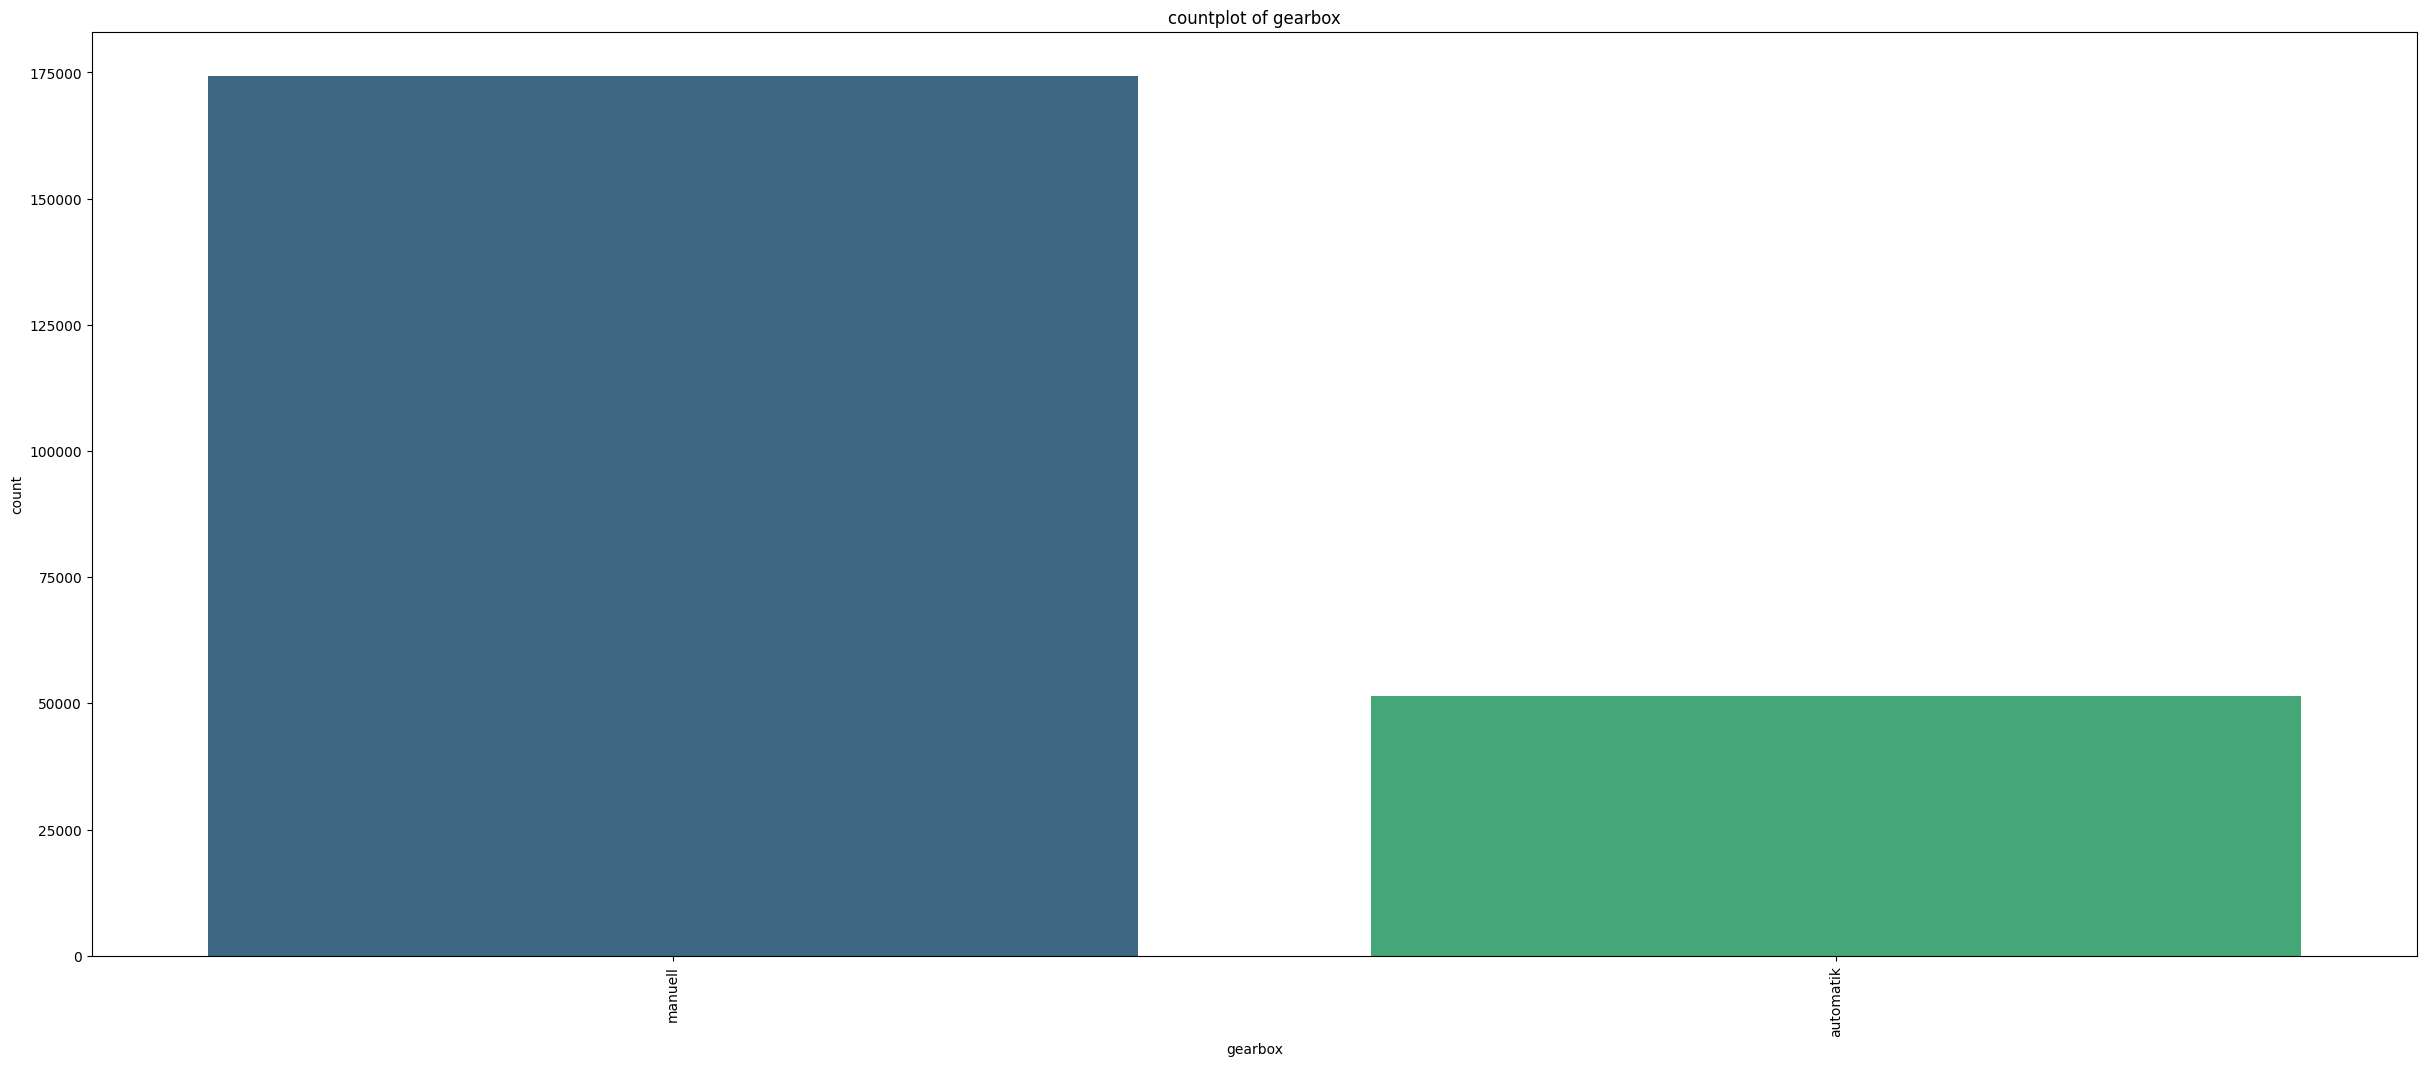

C:\Users\minas\AppData\Local\Temp\ipykernel_17496\3950282079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = x_train[column], palette='viridis')


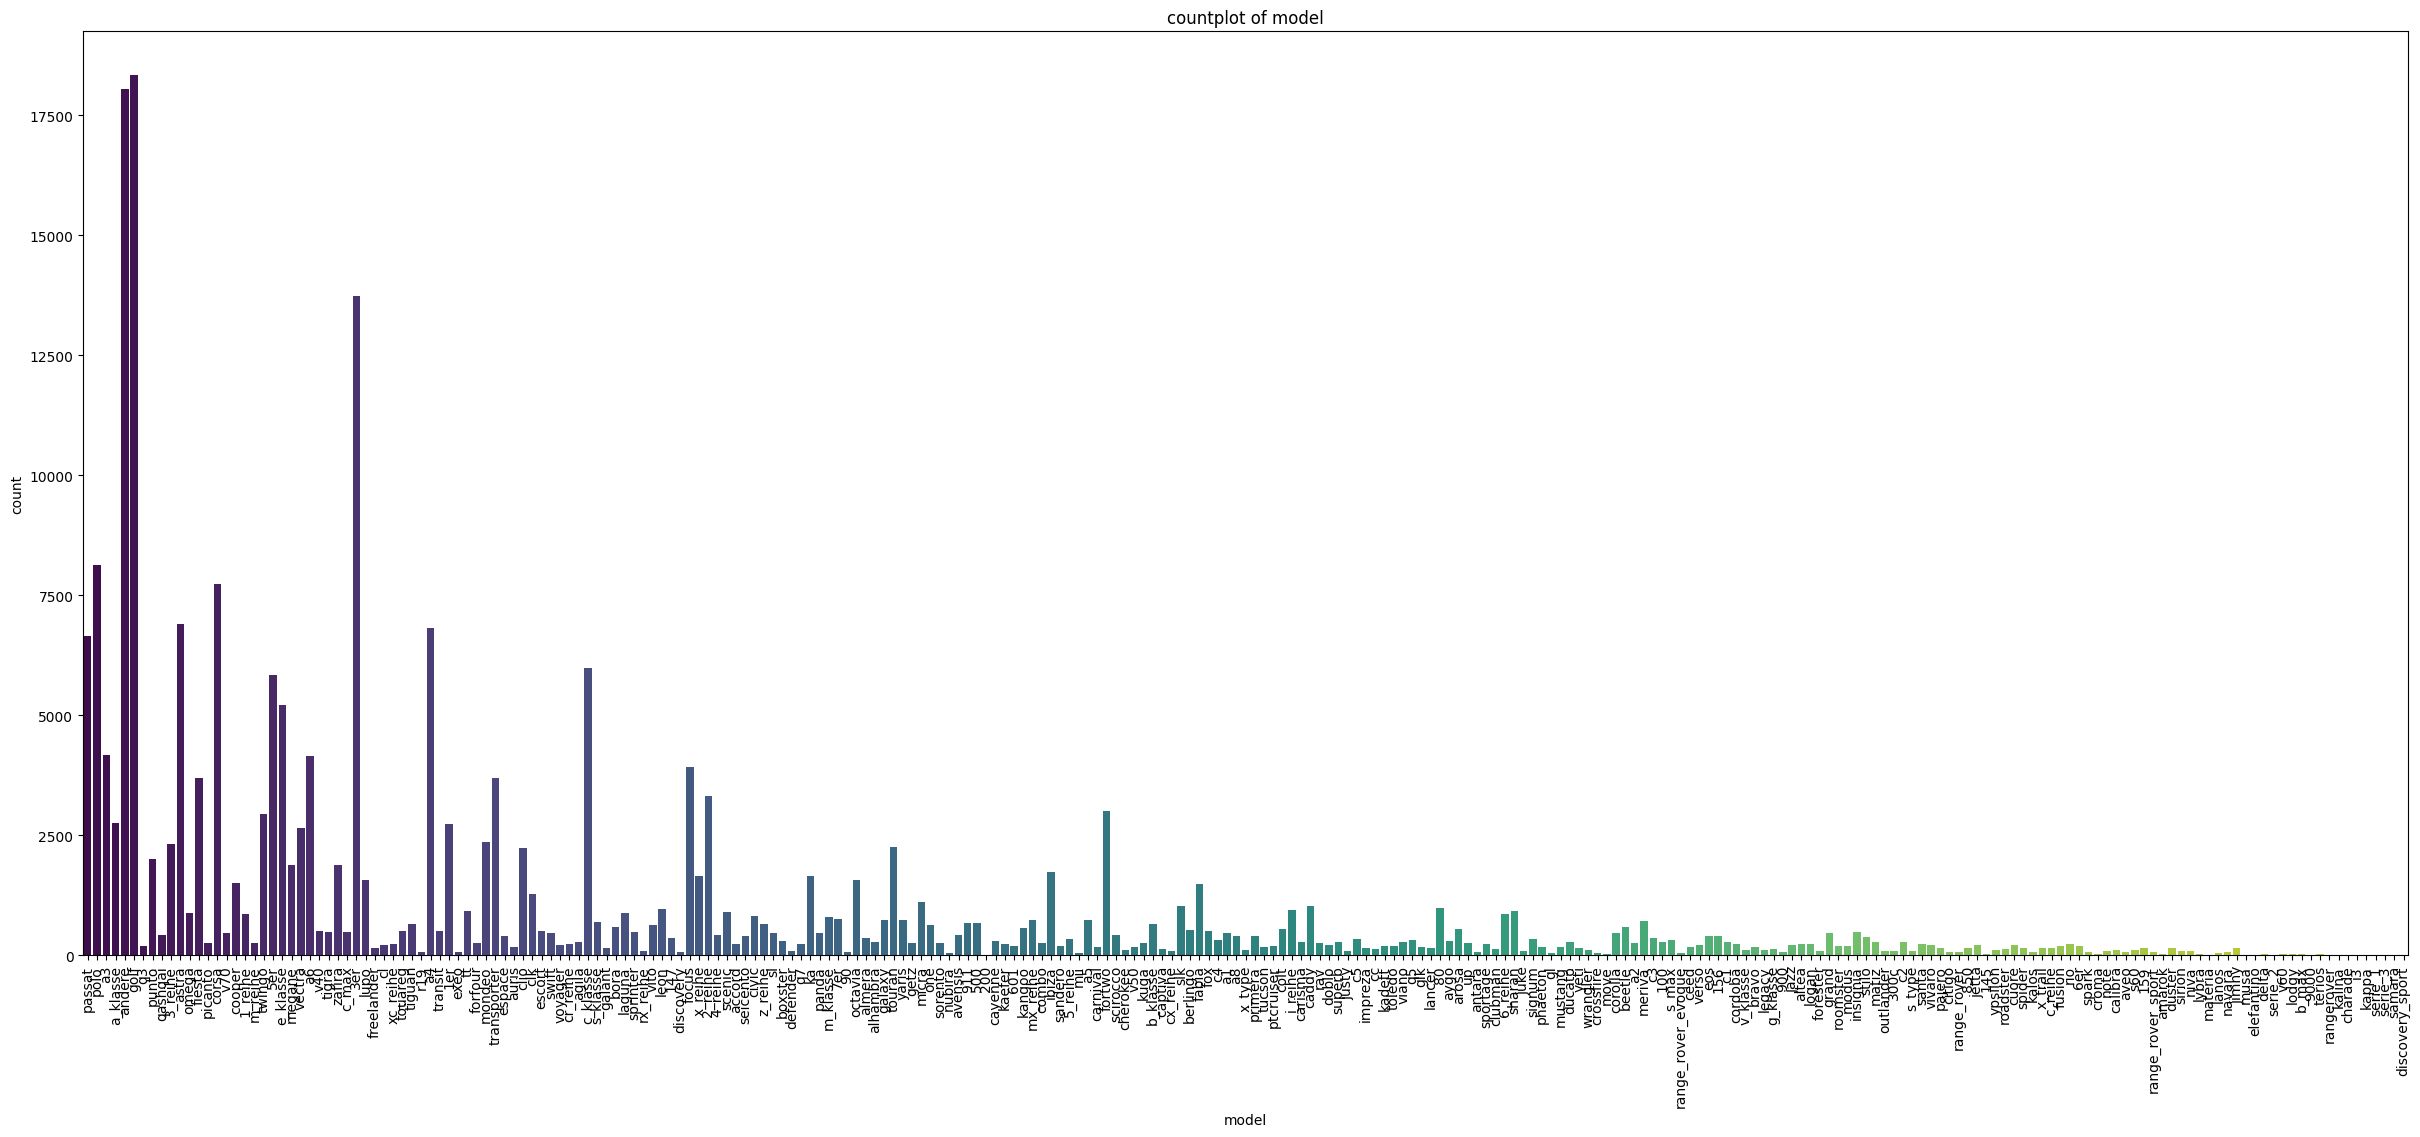

C:\Users\minas\AppData\Local\Temp\ipykernel_17496\3950282079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = x_train[column], palette='viridis')


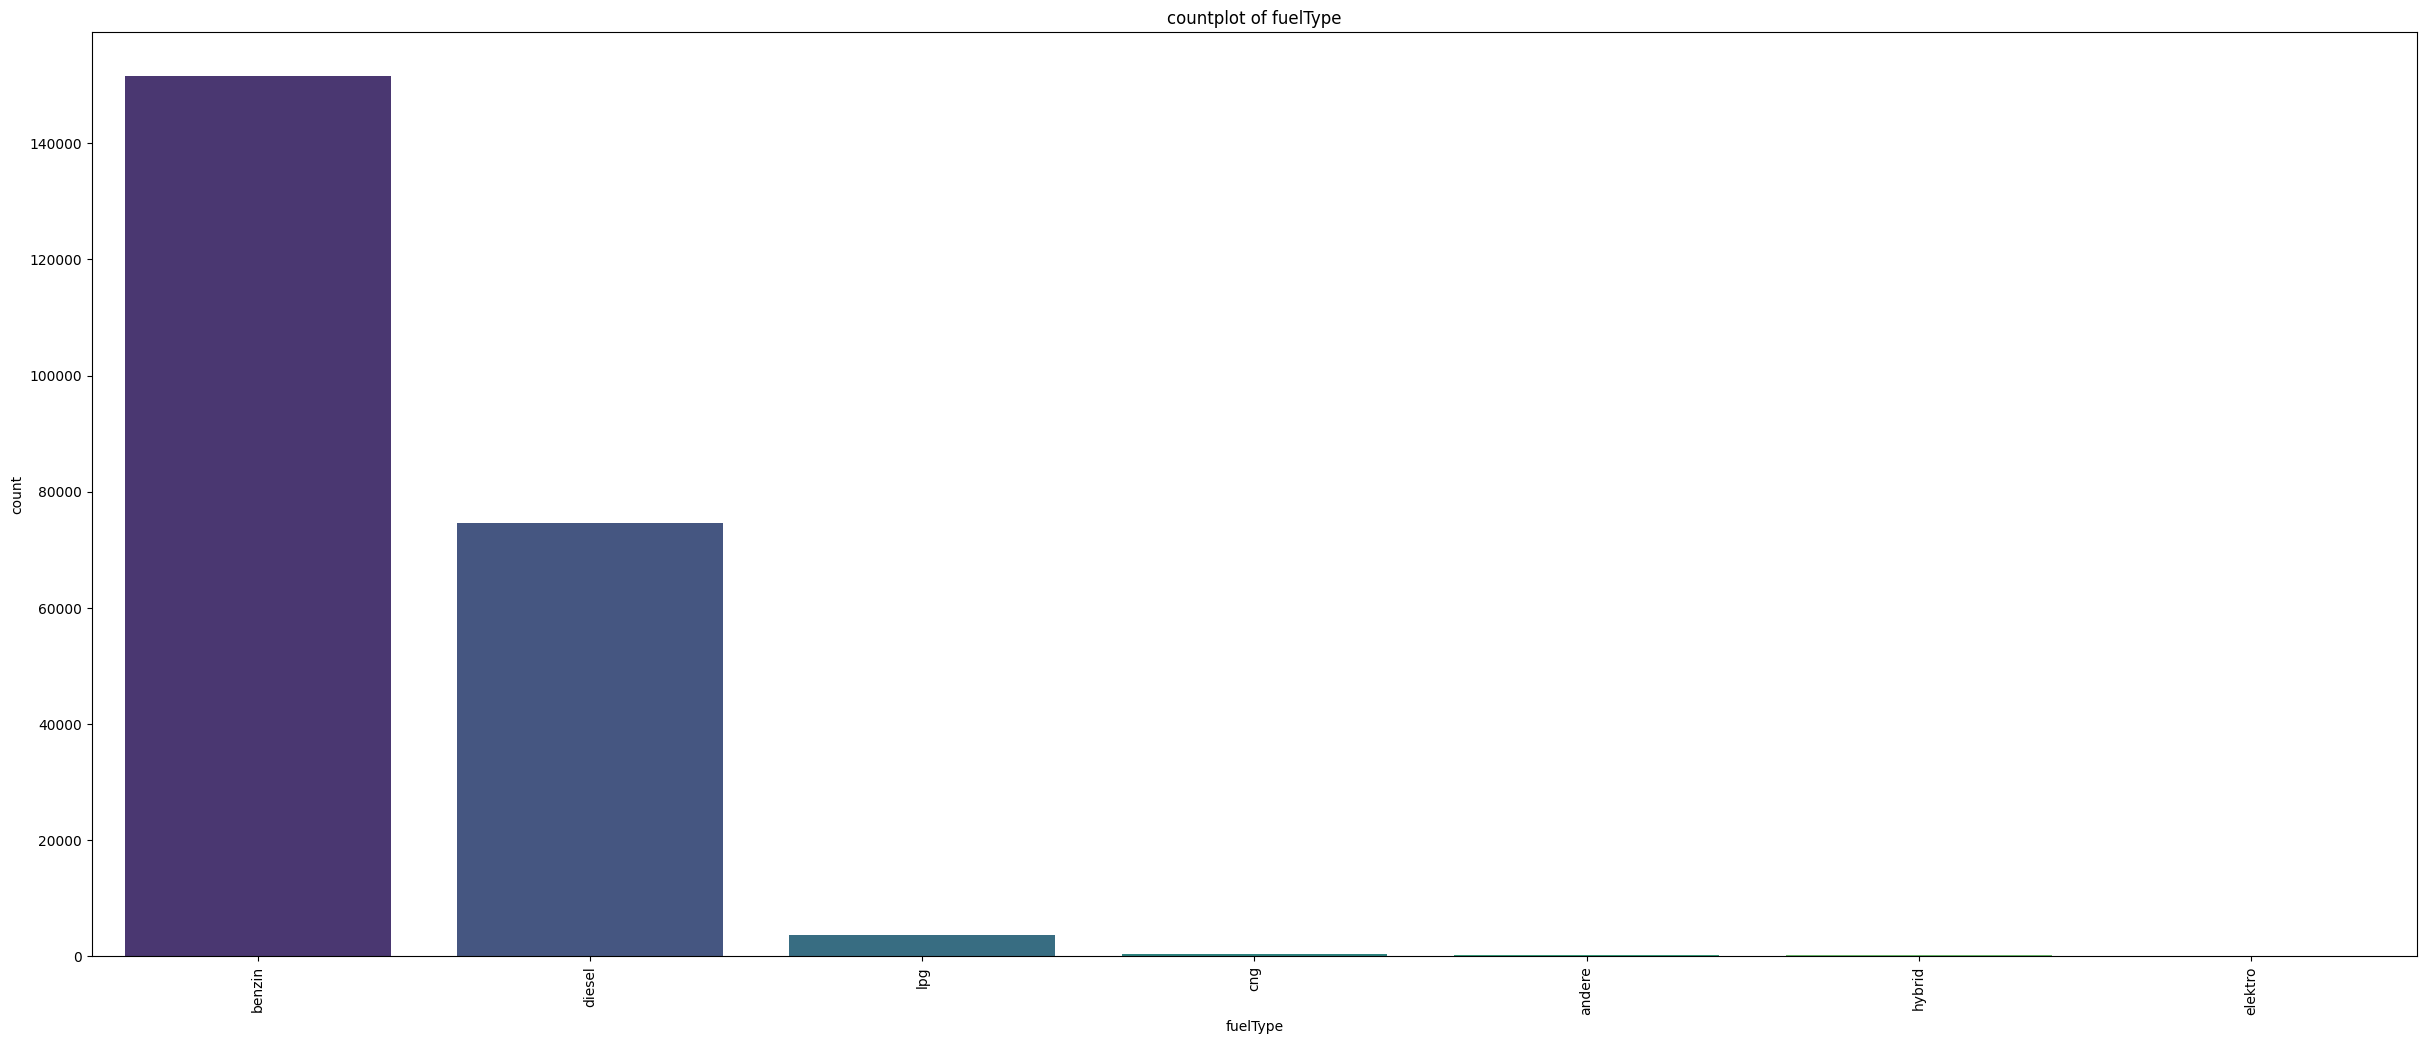

C:\Users\minas\AppData\Local\Temp\ipykernel_17496\3950282079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = x_train[column], palette='viridis')


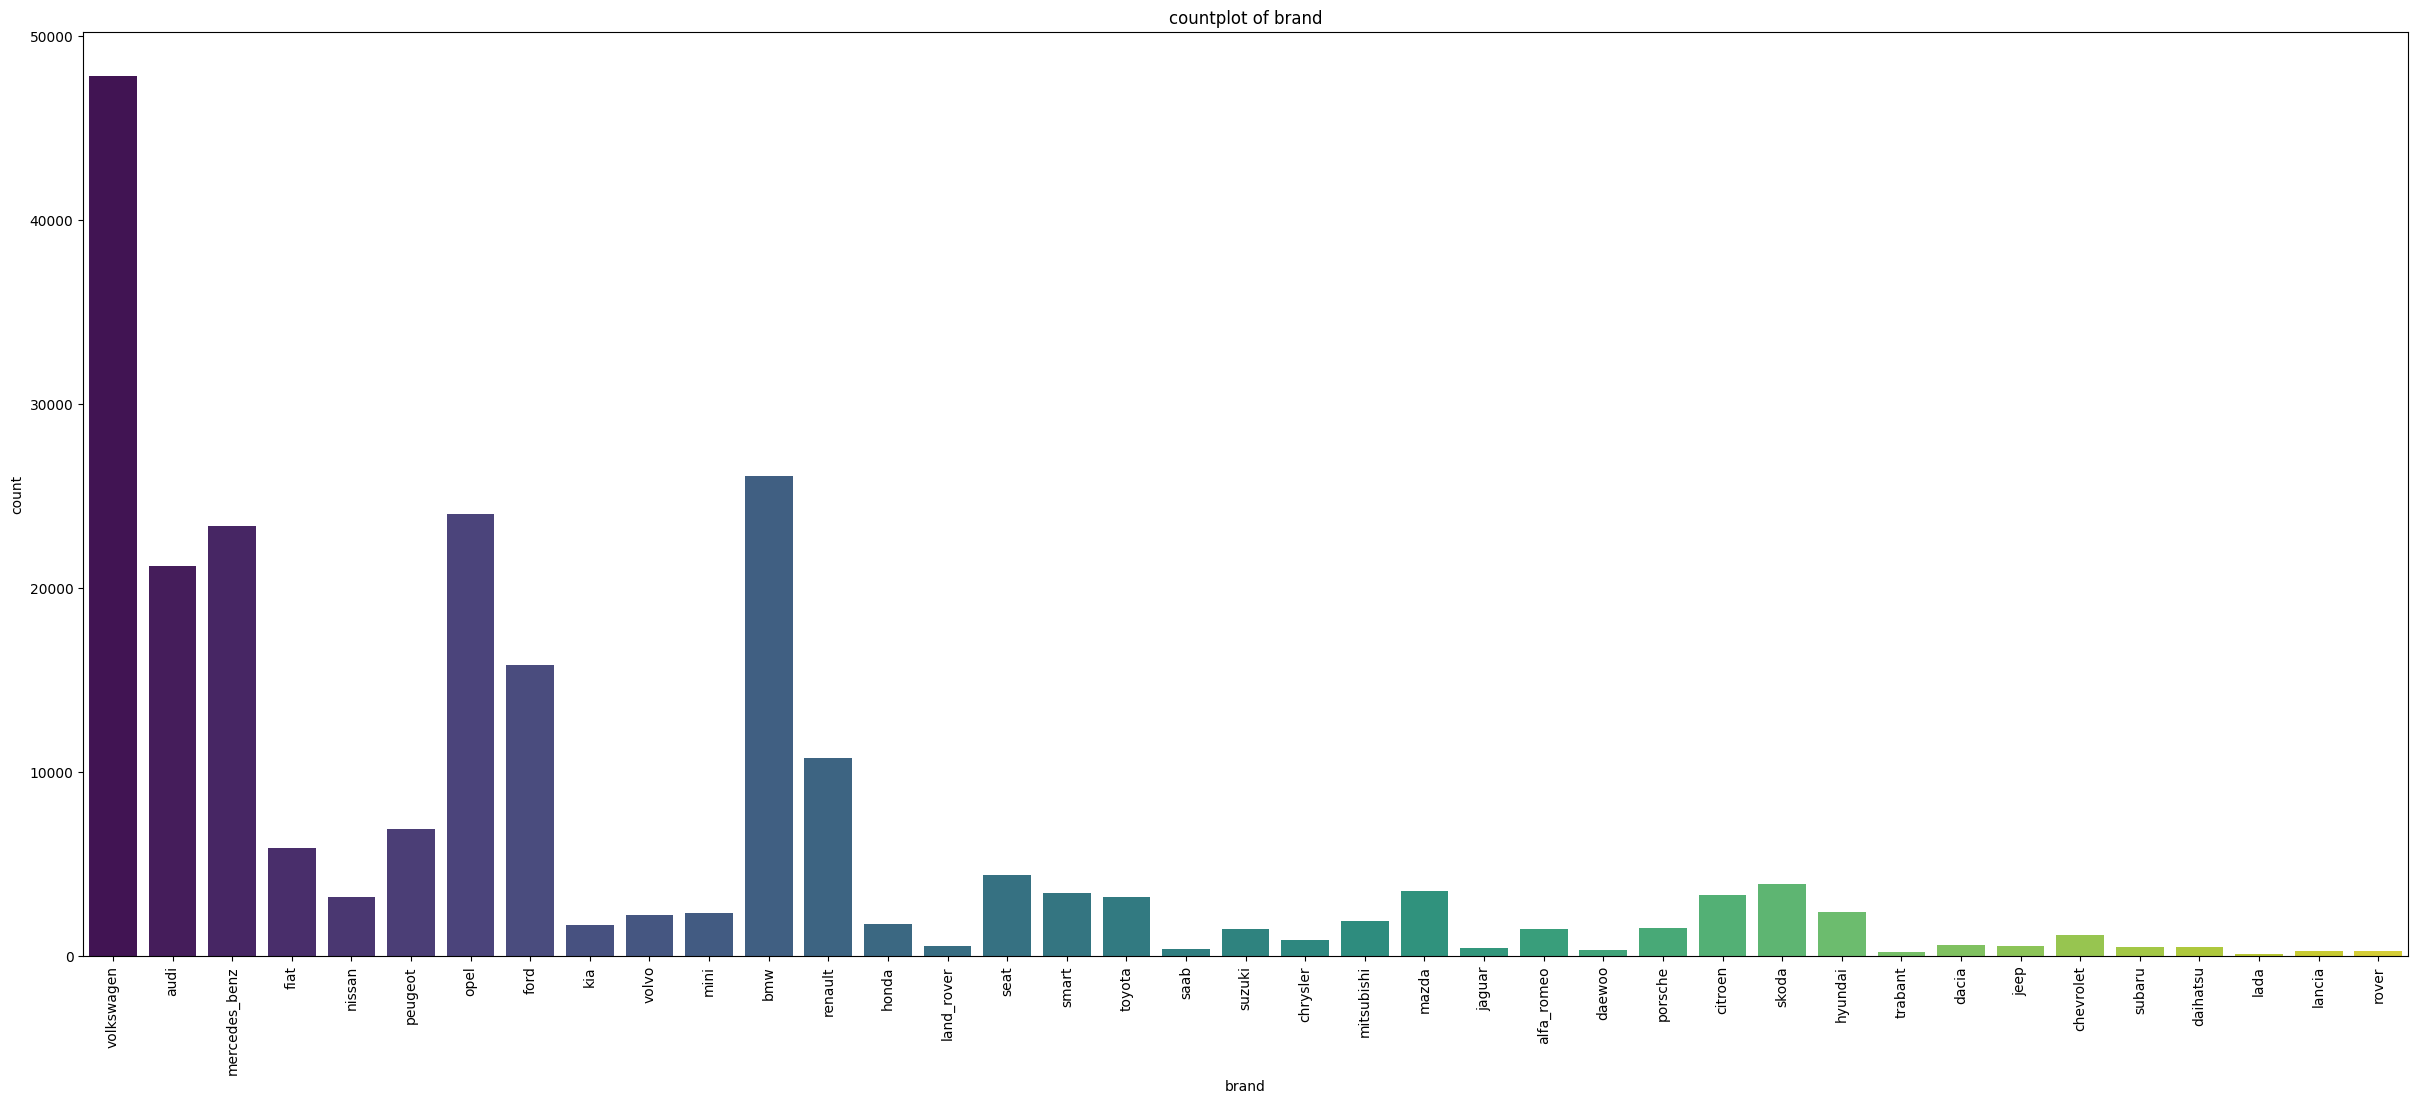

C:\Users\minas\AppData\Local\Temp\ipykernel_17496\3950282079.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = x_train[column], palette='viridis')


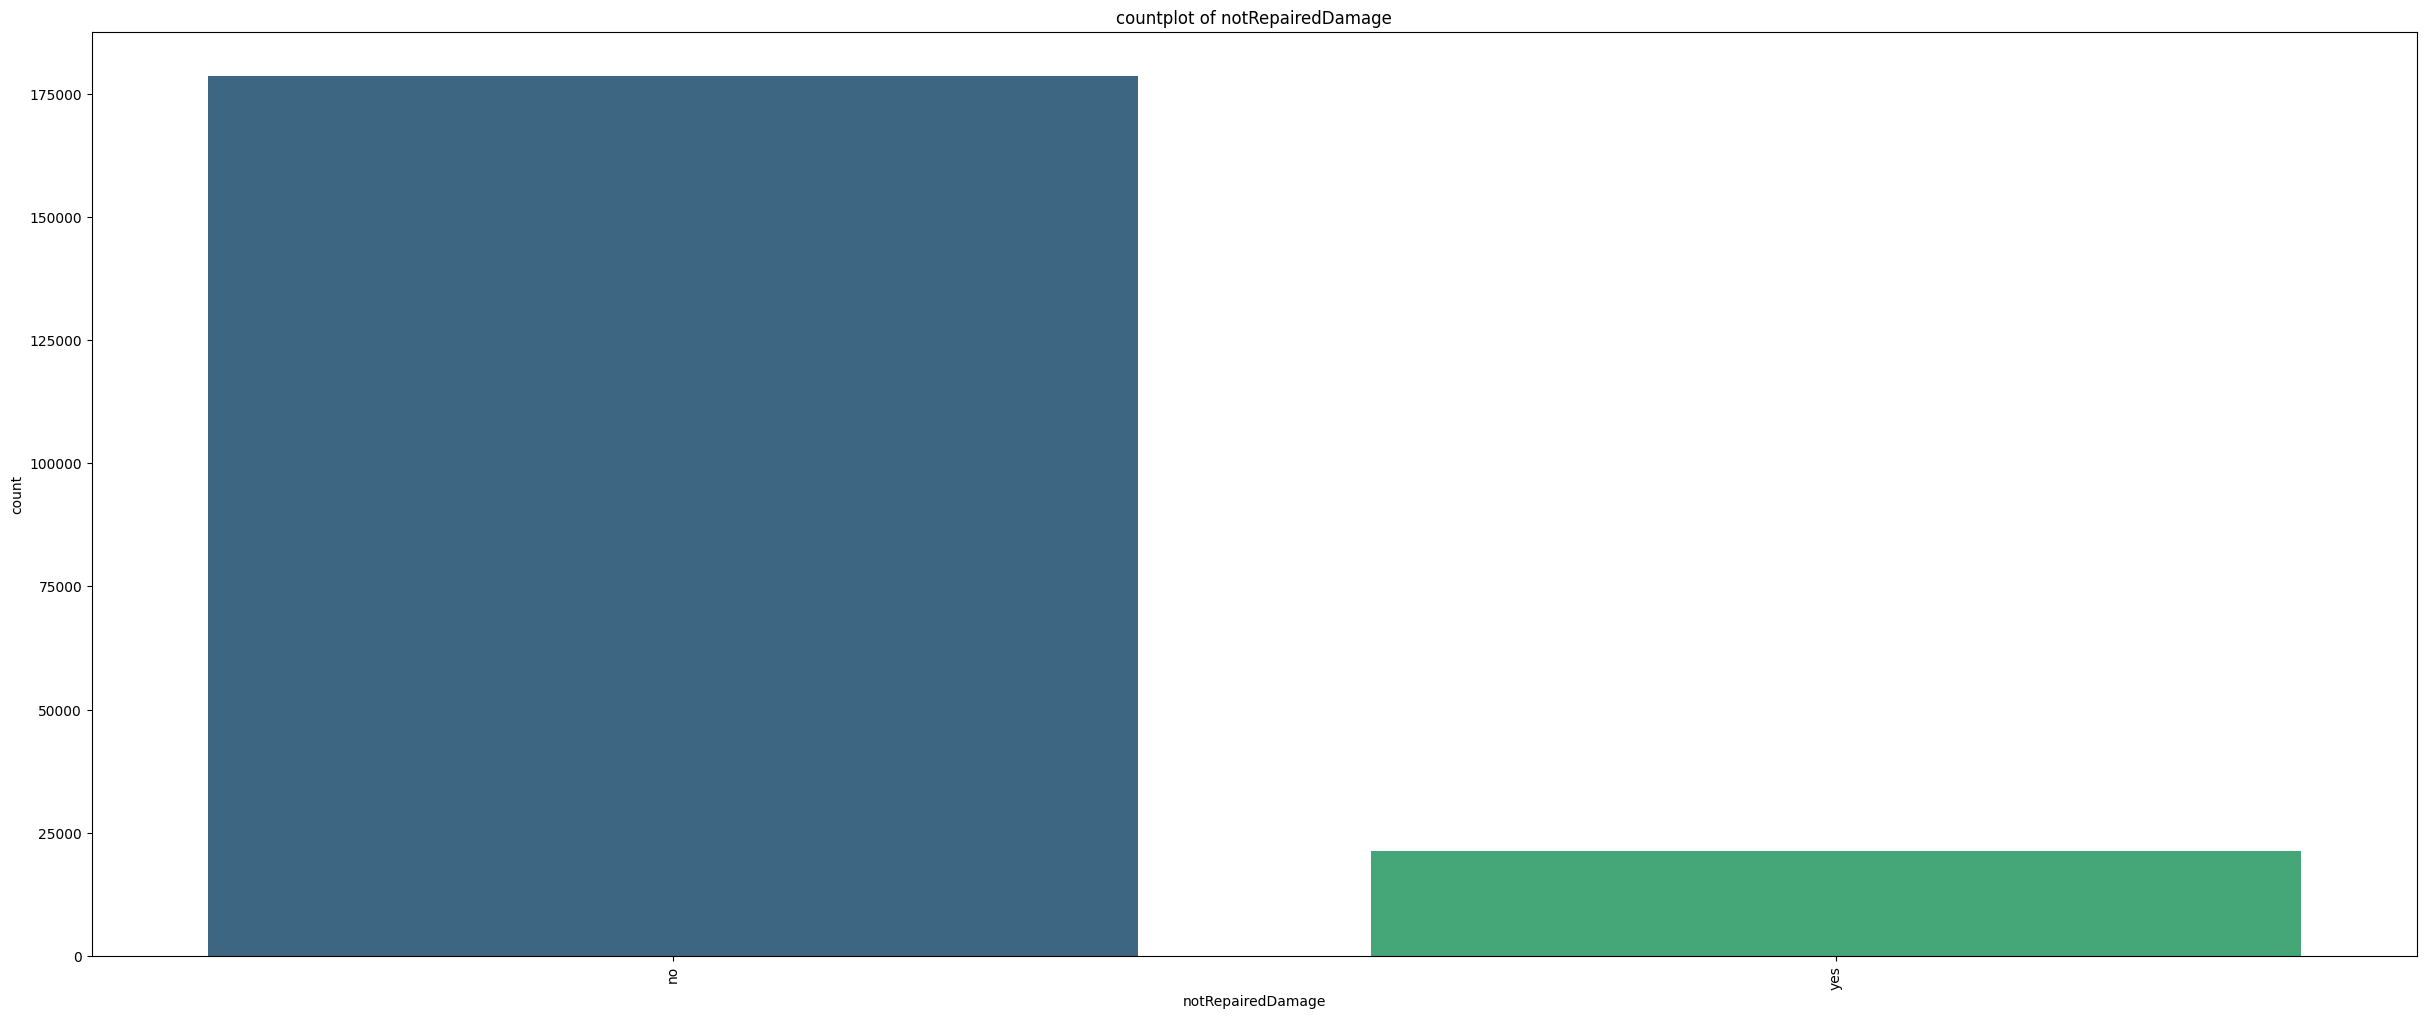

In [14]:
for column in x_train.select_dtypes(include="O").columns:
    plt.figure(figsize=(30,12))
    plt.tight_layout()
    sns.countplot(x = x_train[column], palette='viridis')
    plt.title(f'countplot of {column}')
    plt.xticks(rotation=90)
    plt.show()


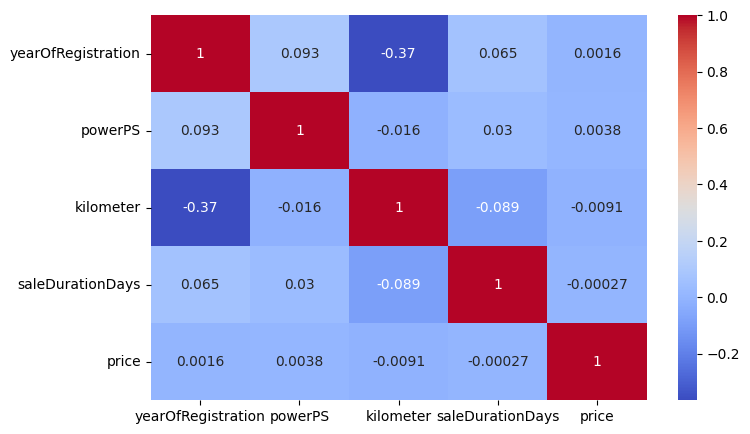

In [15]:
# Ensure only numeric columns are selected for correlation calculation
numeric_df = train_data.select_dtypes(include=['number'])

# Generate the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [16]:
df.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage',
       'saleDurationDays'],
      dtype='object')

1) How does the vehicle type impact the sale duration?

vehicleType
andere        7.0
bus           6.0
cabrio        8.0
coupe         8.0
kleinwagen    6.0
kombi         6.0
limousine     7.0
suv           8.0
Name: saleDurationDays, dtype: float64


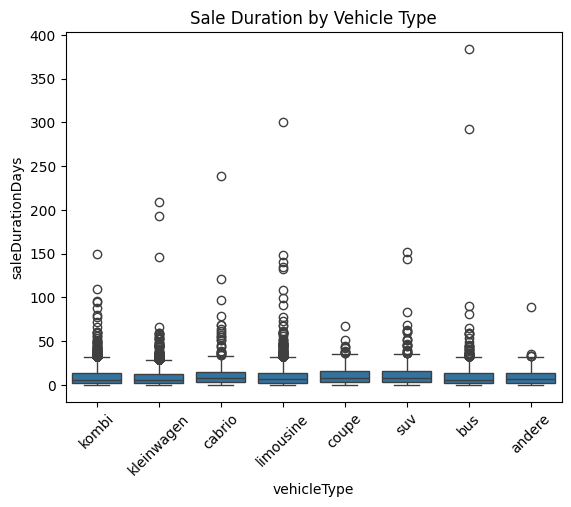

In [17]:
avg_sale_duraction = train_data.groupby('vehicleType')['saleDurationDays'].median()
print(avg_sale_duraction)
sns.boxplot(data=train_data, x='vehicleType', y='saleDurationDays')
plt.title('Sale Duration by Vehicle Type')
plt.xticks(rotation=45)
plt.show()


2) Which fuel types are associated with the highest and lowest average prices?

fuelType
hybrid     11595.0
elektro     6499.0
diesel      6350.0
cng         3950.0
lpg         3000.0
benzin      2500.0
andere      1200.0
Name: price, dtype: float64


C:\Users\minas\AppData\Local\Temp\ipykernel_17496\608721229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_fuel.index, y=avg_price_fuel, palette='viridis')


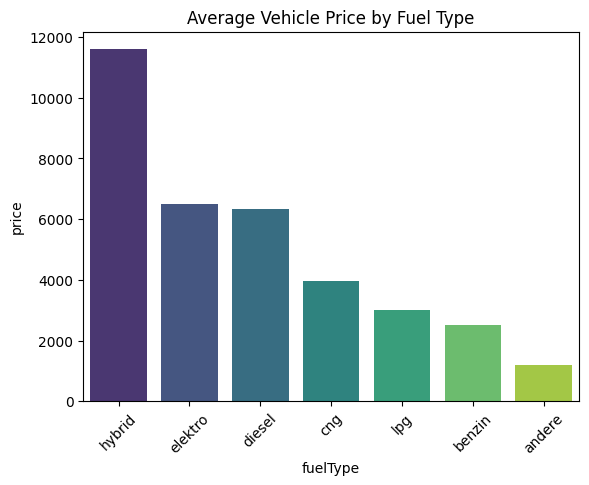

In [18]:
avg_price_fuel = train_data.groupby('fuelType')['price'].median().sort_values(ascending=False)
print(avg_price_fuel)
sns.barplot(x=avg_price_fuel.index, y=avg_price_fuel, palette='viridis')
plt.title('Average Vehicle Price by Fuel Type')
plt.xticks(rotation=45)
plt.show()


3) What is the distribution of vehicle prices across different brands?

C:\Users\minas\AppData\Local\Temp\ipykernel_17496\2426504202.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='price', data=train_data, palette='viridis')


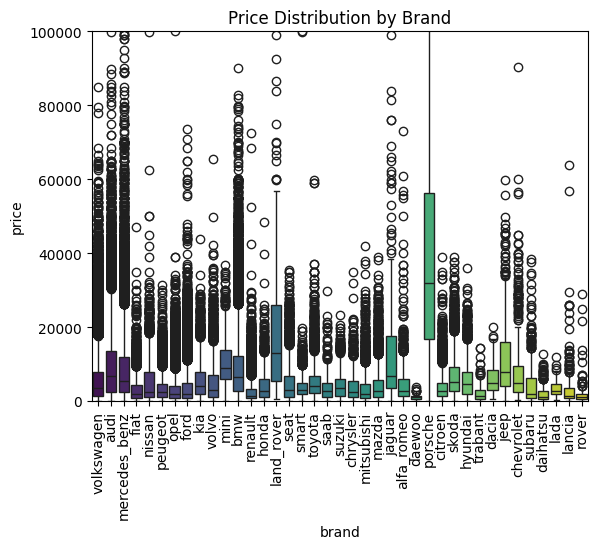

In [19]:
sns.boxplot(x='brand', y='price', data=train_data, palette='viridis')
plt.title('Price Distribution by Brand')
plt.ylim([0,100000])
plt.xticks(rotation=90)
plt.show()

brand
porsche          32000.0
land_rover       12999.0
mini              8888.0
jeep              7900.0
jaguar            6900.0
audi              6800.0
bmw               6500.0
mercedes_benz     5500.0
skoda             5300.0
dacia             4900.0
chevrolet         4800.0
hyundai           4500.0
toyota            4200.0
kia               4150.0
volkswagen        3500.0
suzuki            3499.0
seat              3095.0
smart             3000.0
volvo             2990.0
lada              2850.0
mazda             2800.0
citroen           2790.0
honda             2700.0
saab              2670.0
alfa_romeo        2650.0
chrysler          2500.0
peugeot           2500.0
nissan            2490.0
subaru            2000.0
ford              1999.0
mitsubishi        1990.0
fiat              1900.0
opel              1850.0
renault           1500.0
trabant           1500.0
lancia            1290.0
daihatsu          1200.0
rover             1025.0
daewoo            1025.0
Name: price, dtype:

C:\Users\minas\AppData\Local\Temp\ipykernel_17496\1662800397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values, palette='viridis')


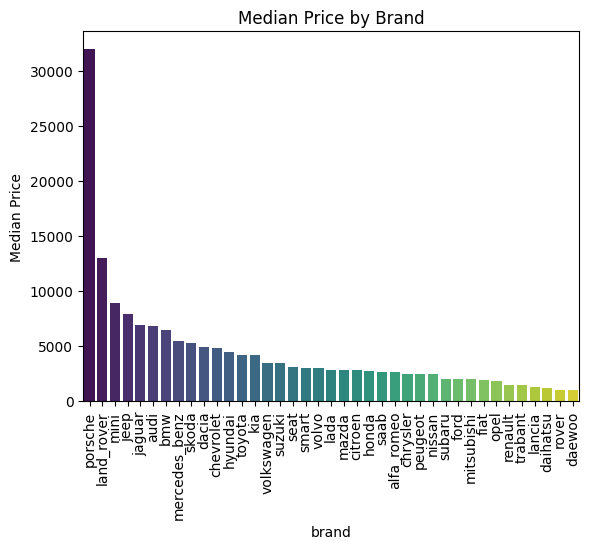

In [20]:
avg_price_brand = train_data.groupby('brand')['price'].median().sort_values(ascending=False)
print(avg_price_brand)
sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values, palette='viridis')
plt.title('Median Price by Brand')
plt.xticks(rotation=90)
plt.ylabel('Median Price')
plt.show()


4) How does the brand of a vehicle impact the median sale duration?

brand
lancia           10.0
mini              9.0
alfa_romeo        8.0
jaguar            8.0
trabant           8.0
subaru            8.0
saab              8.0
porsche           8.0
land_rover        8.0
lada              8.0
volvo             8.0
chevrolet         8.0
honda             7.0
audi              7.0
seat              7.0
skoda             7.0
hyundai           7.0
mitsubishi        7.0
chrysler          7.0
mercedes_benz     7.0
bmw               7.0
kia               7.0
jeep              7.0
rover             7.0
dacia             6.5
suzuki            6.0
toyota            6.0
smart             6.0
volkswagen        6.0
peugeot           6.0
renault           6.0
citroen           6.0
opel              6.0
nissan            6.0
daihatsu          6.0
fiat              6.0
ford              6.0
mazda             6.0
daewoo            5.0
Name: saleDurationDays, dtype: float64


C:\Users\minas\AppData\Local\Temp\ipykernel_17496\2441291911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_brand.index, y=avg_saleDurationDays.values, palette='viridis')


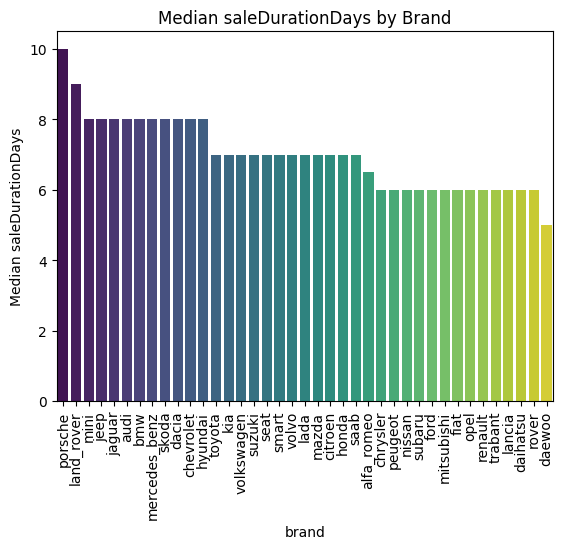

In [21]:
avg_saleDurationDays = train_data.groupby('brand')['saleDurationDays'].median().sort_values(ascending=False)
print(avg_saleDurationDays)
sns.barplot(x=avg_price_brand.index, y=avg_saleDurationDays.values, palette='viridis')
plt.title('Median saleDurationDays by Brand')
plt.xticks(rotation=90)
plt.ylabel('Median saleDurationDays')
plt.show()


5) What is the trend in sale duration based on the vehicle's age?

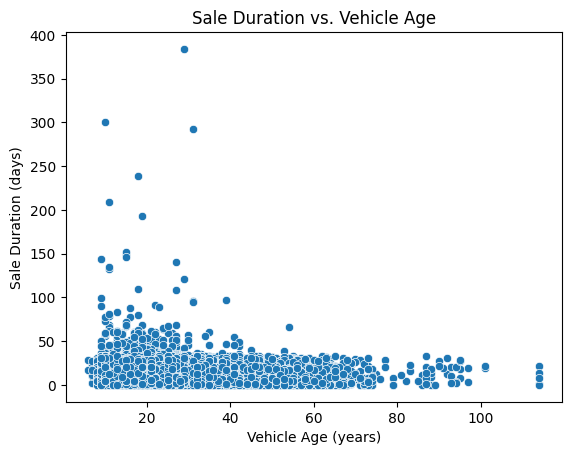

In [22]:
current_year = pd.to_datetime("today").year
train_data['vehicle_age'] = current_year - train_data['yearOfRegistration']
sns.scatterplot(x='vehicle_age', y='saleDurationDays', data=train_data)
plt.title('Sale Duration vs. Vehicle Age')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Sale Duration (days)')
plt.show()


## pre-processing

In [23]:
for col in x_train.columns:
    print(f"{col}:\n")
    print("No.unique: ",df[col].nunique())
    print("unique value: ",df[col].unique(), "\n")
    print("**"*20)

vehicleType:

No.unique:  8
unique value:  ['suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'coupe' 'andere'] 

****************************************
yearOfRegistration:

No.unique:  91
unique value:  [2004 2001 2008 1995 2014 2005 2011 1910 2007 2009 2002 1997 1990 1981
 2003 1994 1984 2006 1999 1998 2012 2010 2000 1992 1993 2013 1991 1996
 1989 2015 1968 1982 1976 1983 1959 1973 1969 1971 1987 1986 1988 1967
 2016 1980 1985 1965 1945 1974 1979 1955 1978 1972 1977 1966 1975 1970
 1937 1961 1963 1936 1962 1960 1964 1951 1949 1953 1954 1957 1958 1956
 2017 1941 1950 1948 1952 1932 1927 1931 2018 1942 1923 1930 1943 1947
 1934 1938 1935 1929 1939 1928 1933] 

****************************************
gearbox:

No.unique:  2
unique value:  ['automatik' 'manuell' nan] 

****************************************
powerPS:

No.unique:  673
unique value:  [  163    75    69   102   109   125   105   140   115   190     0   136
   160   231    50   118   193    99    60   113   218   122

In [24]:
class LogTransformer(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        # Store the number of features in the input
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X, y=None):
        # Ensure the input has the correct number of features
        assert self.n_features_in_ == X.shape[1], "Input shape does not match the fitted shape"
        return np.log1p(X)  # Apply log transformation
    
log_transformer = LogTransformer()
log_transformer

LogTransformer()

In [25]:
x_train.columns

Index(['vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'fuelType', 'brand', 'notRepairedDamage',
       'saleDurationDays'],
      dtype='object')

In [26]:
numerical_pipeline = Pipeline(steps=[ 
    ("median_num_imputer", SimpleImputer(strategy='median')),
    ("log", LogTransformer()),
    ("poly", PolynomialFeatures(degree=5, include_bias=False)),
    ("scale", StandardScaler())
])

categorical7_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

categorical_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy='most_frequent')),
    ("encode", BinaryEncoder())
])

In [27]:
categorical7_features = [ 'gearbox', 'fuelType', 'notRepairedDamage']
categorical_features = ['vehicleType', 'model', 'brand',]
numerical_features = ['yearOfRegistration', 'powerPS', 'kilometer', 'saleDurationDays']


preprocessing = ColumnTransformer(transformers=[
        ("numerical_pipeline", numerical_pipeline, numerical_features),
        ("categorical7_pipeline", categorical7_pipeline, categorical7_features),
        ("categorical_pipeline", categorical_pipeline, categorical_features),
    ]
)
preprocessing

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log', LogTransformer()),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5,
                                                                     include_bias=False)),
                                                 ('scale', StandardScaler())]),
                                 ['yearOfRegistration', 'powerPS', 'kilometer',
                                  'saleDurationDays']),
                                ('categorical7_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gearbox', 'fuelType', 'notRepairedDamage']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', BinaryEncoder())]),
                                 ['vehicleType', 'model', 'brand'])])

In [28]:
x_preprocessed = preprocessing.fit_transform(x_train)
x_preprocessed

array([[-1.04899112, -3.63954926,  0.49776587, ...,  0.        ,
         0.        ,  1.        ],
       [-0.89759183, -0.43419362,  0.49776587, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.76281709,  0.50298138, -0.2095473 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.04899112, -0.10899072,  0.49776587, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.00921569,  0.23573631, -0.39334291, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.51454525,  1.20948763,  0.49776587, ...,  0.        ,
         1.        ,  1.        ]])

In [29]:
pd.DataFrame(x_preprocessed).describe()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
count,2.304840e+05,2.304840e+05,2.304840e+05,2.304840e+05,2.304840e+05,2.304840e+05,2.304840e+05,2.304840e+05,2.304840e+05,2.304840e+05,...,230484.000000,230484.000000,230484.000000,230484.000000,230484.000000,230484.000000,230484.000000,230484.000000,230484.000000,230484.000000
mean,-2.479668e-09,5.989686e-13,1.203762e-13,-2.352533e-12,7.413710e-10,2.432130e-13,-1.237404e-11,-1.125903e-13,3.860642e-13,-9.207749e-13,...,0.419426,0.607053,0.551648,0.499124,0.017190,0.142869,0.324838,0.425088,0.425479,0.566551
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,0.493466,0.488406,0.497326,0.500000,0.129979,0.349940,0.468315,0.494357,0.494416,0.495552
min,-1.436134e+01,-3.639549e+00,-5.435161e+00,-1.837456e+00,-1.432125e+01,-3.639057e+00,-5.541051e+00,-1.837403e+00,-3.075413e+00,-3.581554e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.950204e-01,-1.089907e-01,-2.095473e-01,-7.675472e-01,-5.953499e-01,-1.092764e-01,-2.019237e-01,-7.673284e-01,-3.845745e-01,-1.329274e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.215695e-03,2.071287e-01,4.977659e-01,5.761356e-02,9.001112e-03,2.085382e-01,4.923189e-01,5.907503e-02,1.188630e-01,2.283631e-01,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.628171e-01,4.507049e-01,4.977659e-01,7.998414e-01,7.629683e-01,4.511009e-01,4.991667e-01,8.006479e-01,5.362014e-01,4.865080e-01,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2.264409e+00,4.434145e+00,4.977659e-01,3.960248e+00,2.266026e+00,4.431267e+00,5.196082e-01,3.957007e+00,1.099625e+01,4.559516e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
y_preprocessed = log_transformer.fit_transform(np.array(y_train).reshape(-1, 1))
y_preprocessed

array([[ 6.80350526],
       [ 6.80239476],
       [ 9.58197289],
       ...,
       [ 5.52545294],
       [ 8.83214991],
       [10.94201362]])

<Axes: >

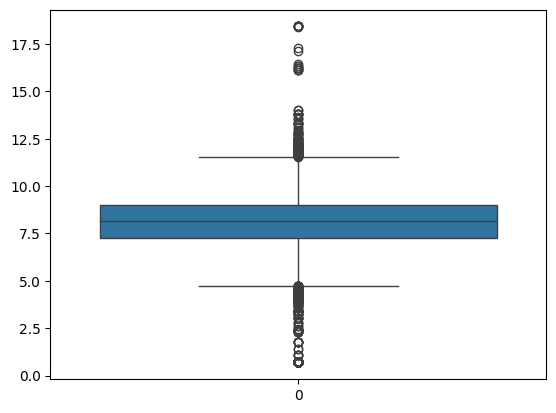

In [31]:
sns.boxplot(y_preprocessed)

<Axes: ylabel='Count'>

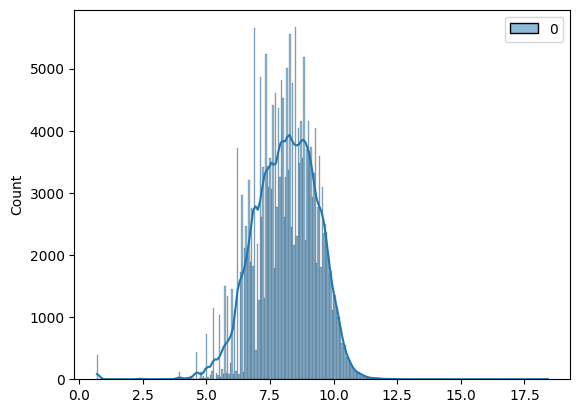

In [32]:
sns.histplot(y_preprocessed, kde=True)

In [33]:
X_test_preprocessed = preprocessing.transform(x_test)
X_test_preprocessed

array([[-0.89759183,  0.45070492,  0.49776587, ...,  1.        ,
         0.        ,  0.        ],
       [-0.14173019, -0.02739934,  0.49776587, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.00921569,  0.2071287 ,  0.49776587, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.51454525,  0.61625926, -2.30979292, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.46160184,  0.58481385,  0.49776587, ...,  1.        ,
         0.        ,  0.        ],
       [-0.29275146,  0.16224213,  0.49776587, ...,  0.        ,
         0.        ,  1.        ]])

In [34]:
y_test_preprocessed = log_transformer.transform(np.array(y_test).reshape(-1, 1))
y_test_preprocessed

array([[ 7.31388683],
       [ 7.13169851],
       [ 6.95749737],
       ...,
       [10.46882977],
       [ 8.82482494],
       [ 6.31173481]])

## Modeling

In [35]:
# valid set importance: for hyperparameters tuning & determine best 5 models
x_preprocessed_train, x_preprocessed_valid, y_preprocessed_train, y_preprocessed_valid = train_test_split(x_preprocessed, y_preprocessed, test_size=0.2, shuffle=True, random_state=42)
model = LinearRegression()
model.fit(x_preprocessed_train, y_preprocessed_train)
print(model.score(x_preprocessed_train, y_preprocessed_train))
print(model.score(x_preprocessed_valid, y_preprocessed_valid))

0.7425680304391933
0.7399310586017864


In [36]:
mse_scores = -1 * cross_val_score(LinearRegression(), x_preprocessed, y_preprocessed, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", mse_scores)
print("Mean MSE:", mse_scores.mean())


r2_scores = cross_val_score(LinearRegression(), x_preprocessed, y_preprocessed, cv=5, scoring='r2')
print("Cross-validated R²:", r2_scores)
print("Mean R²:", r2_scores.mean())


Cross-validated MSE: [0.40845108 0.39347653 0.3900823  0.39230736 0.40683157]
Mean MSE: 0.3982297663891002
Cross-validated R²: [0.7308845  0.73916205 0.74057681 0.74152714 0.7347895 ]
Mean R²: 0.7373880007279239


## Hyperparameters Tuning


In [37]:
preprocessing

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('median_num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log', LogTransformer()),
                                                 ('poly',
                                                  PolynomialFeatures(degree=5,
                                                                     include_bias=False)),
                                                 ('scale', StandardScaler())]),
                                 ['yearOfRegistration', 'powerPS', 'kilometer',
                                  'saleDurationDays']),
                                ('categorical7_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gearbox', 'fuelType', 'notRepairedDamage']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', BinaryEncoder())]),
                                 ['vehicleType', 'model', 'brand'])])

In [38]:
from sklearn.pipeline import Pipeline
linearregression_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", LinearRegression())
    ])

linearregression_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('median_num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   LogTransformer()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['yearOfRegistration',
                                                   'powerPS', 'kilometer',
                                                   'saleDurationDays']),
                                                 ('categorical7_...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gearbox', 'fuelType',
                                                   'notRepairedDamage']),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['vehicleType', 'model',
                                                   'brand'])])),
                ('model', LinearRegression())])

In [39]:
linearregression_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('median_num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   LogTransformer()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['yearOfRegistration',
                                                   'powerPS', 'kilometer',
                                                   'saleDurationDays']),
                                                 ('categorical7_...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gearbox', 'fuelType',
                                                   'notRepairedDamage']),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['vehicleType', 'model',
                                                   'brand'])])),
                ('model', LinearRegression())])

In [40]:
linearregression_pipeline.predict(x_train)

array([35569.71641369,  9004.71641369, 23209.02891369, ...,
       -3370.72108631,   497.09141369, 42115.59141369])

In [41]:
linearregression_pipeline.steps

[('preprocessing',
  ColumnTransformer(transformers=[('numerical_pipeline',
                                   Pipeline(steps=[('median_num_imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('log', LogTransformer()),
                                                   ('poly',
                                                    PolynomialFeatures(degree=5,
                                                                       include_bias=False)),
                                                   ('scale', StandardScaler())]),
                                   ['yearOfRegistration', 'powerPS', 'kilometer',
                                    'saleDurationDays']),
                                  ('categorical7_pipeline',
                                   Pipeline(steps=[('impute',
                                                    SimpleImputer(strategy='most_frequent')),
             

In [42]:
hyper_params = {
    "preprocessing__numerical_pipeline__poly__degree": list(range(1,11))
}
linearregression = GridSearchCV(linearregression_pipeline, hyper_params, cv=5, scoring='neg_mean_squared_error')
log_transformer = LogTransformer()
linearregression.fit(x_train, log_transformer.fit_transform(np.array(y_train).reshape(-1, 1)))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numerical_pipeline',
                                                                         Pipeline(steps=[('median_num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log',
                                                                                          LogTransformer()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=5,
                                                                                                             include_bias=False)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['yearOfRegistration',
                                                                          'powerPS',
                                                                          'kilometer',
                                                                          'saleDur...
                                                                         ['gearbox',
                                                                          'fuelType',
                                                                          'notRepairedDamage']),
                                                                        ('categorical_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          BinaryEncoder())]),
                                                                         ['vehicleType',
                                                                          'model',
                                                                          'brand'])])),
                                       ('model', LinearRegression())]),
             param_grid={'preprocessing__numerical_pipeline__poly__degree': [1,
                                                                             2,
                                                                             3,
                                                                             4,
                                                                             5,
                                                                             6,
                                                                             7,
                                                                             8,
                                                                             9,
                                                                             10]},
             scoring='neg_mean_squared_error')

In [43]:
y_preprocessed_train = log_transformer.fit_transform(np.array(y_train).reshape(-1, 1))
y_preprocessed_test = log_transformer.transform(np.array(y_test).reshape(-1, 1))
y_preprocessed_train

array([[ 6.80350526],
       [ 6.80239476],
       [ 9.58197289],
       ...,
       [ 5.52545294],
       [ 8.83214991],
       [10.94201362]])

## Test Accuracy

In [44]:
y_preprocessed_train_pred = linearregression.predict(x_train)
r2_score(y_true=y_preprocessed, y_pred=y_preprocessed_train_pred)

0.7429160091509612

In [45]:
y_preprocessed_test_pred = linearregression.predict(x_test)
r2_score(y_true=y_preprocessed_test, y_pred=y_preprocessed_test_pred)

0.7387065768370387

In [46]:
np.sqrt(mean_squared_error(y_true=y_preprocessed_test, y_pred=y_preprocessed_test_pred))

0.6347278740008542

In [47]:
y_preprocessed_test_pred = linearregression.predict(x_test)
np.exp(y_preprocessed_test_pred)

array([[ 1645.34192614],
       [ 1391.83060508],
       [ 3641.17862606],
       ...,
       [23667.64212202],
       [ 6438.45142306],
       [ 1565.18243511]])

In [48]:
np.exp(np.sqrt(mean_squared_error(y_true=y_preprocessed_test, y_pred=y_preprocessed_test_pred)))

1.8865087035361554

## confidenece inteval

In [49]:
from scipy import stats

confidence = 0.95
squared_losses = (np.exp(y_preprocessed_test_pred) - np.exp(y_preprocessed_test)) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_losses)-1, loc=np.mean(squared_losses), scale=stats.sem(squared_losses)))

array([[ 6114.83048609],
       [12267.31368107]])

## save model in pkl file

In [50]:
import joblib

joblib.dump(linearregression_pipeline, "linearregression_pipeline.pkl")

['linearregression_pipeline.pkl']

In [51]:
best_model = joblib.load("linearregression_pipeline.pkl")
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('median_num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log',
                                                                   LogTransformer()),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['yearOfRegistration',
                                                   'powerPS', 'kilometer',
                                                   'saleDurationDays']),
                                                 ('categorical7_...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gearbox', 'fuelType',
                                                   'notRepairedDamage']),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   BinaryEncoder())]),
                                                  ['vehicleType', 'model',
                                                   'brand'])])),
                ('model', LinearRegression())])